In [1]:
import torch, mrcfile
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#mw_lines = torch.ones_like(sample) * torch.where(torch.isclose(torch.abs(torch.atan(z/y)) , torch.Tensor([torch.pi/3]), atol = 1e-02), 1, 0)


In [3]:
sample = torch.Tensor(mrcfile.read("/Users/HenryJones/Desktop/emd_47152.map"))

In [4]:
print(sample.shape)

torch.Size([200, 1526, 1084])


In [5]:
z, y, x= torch.meshgrid(torch.linspace(-1 * sample.shape[0]/2, sample.shape[0]/2, steps = sample.shape[0]), 
                        torch.linspace(-1 * sample.shape[1]/2, sample.shape[1]/2, steps = sample.shape[1]),
                        torch.linspace(-1 * sample.shape[2]/2, sample.shape[2]/2, steps = sample.shape[2]))

/Users/HenryJones/miniconda3/envs/envupdate/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403212643/work/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [19]:
mw_mask = torch.ones_like(sample) * torch.where(torch.abs(torch.atan(z/y)) > (torch.pi/3), 1, 0)

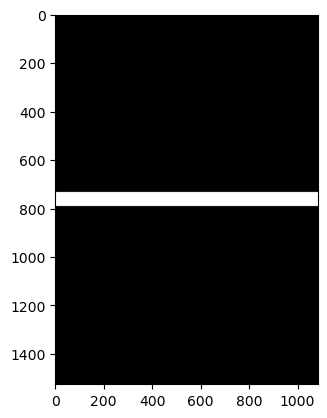

In [21]:
plt.imshow(mw_mask[150,:,:], cmap = "gray")

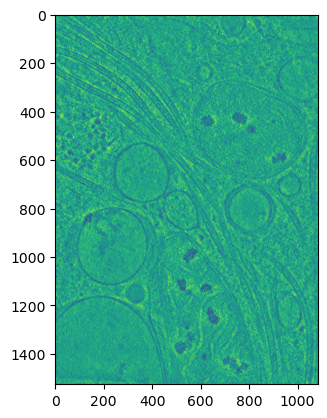

In [7]:
plt.imshow(sample[100, :,:])

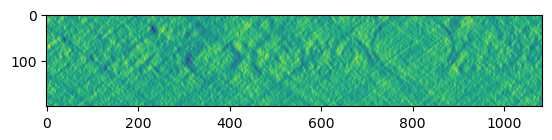

In [8]:
plt.imshow(sample[:, 1526//2,:])

In [9]:
mw_slice = torch.abs(torch.fft.fft(sample[:,1526//2,:]))

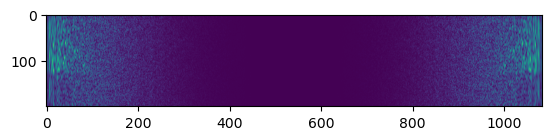

In [10]:
plt.imshow(mw_slice )

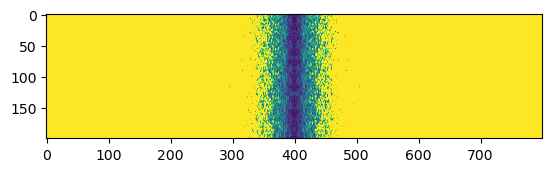

In [11]:
plt.imshow(mw_slice[:,1084//2 - 400: 1084//2 + 400], vmax = 0.01 )

In [12]:
second_slice = torch.abs(torch.fft.fft(sample[:,1526//2,1084 // 2 - 200: 1084 //2 + 200]))

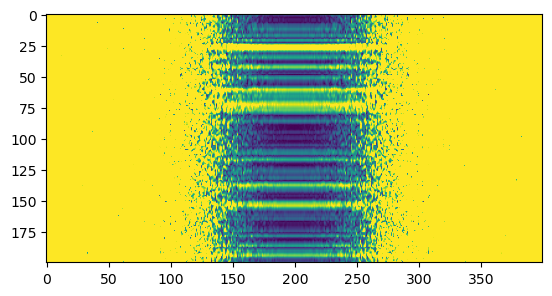

In [13]:
plt.imshow(second_slice, vmax = 0.1)

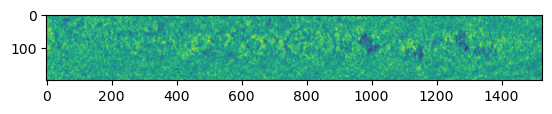

In [14]:
plt.imshow(sample[:, :,1084//2])

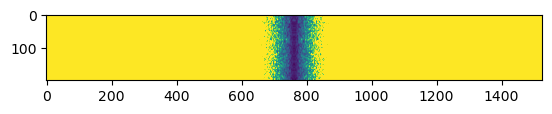

In [15]:
plt.imshow(torch.abs(torch.fft.fft(sample[:, :, 1084 //2])), vmax = 0.01)

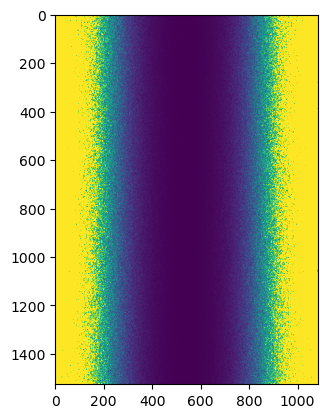

In [16]:
plt.imshow(torch.abs(torch.fft.fft(sample[100,:,:])), vmax = 2)

In [22]:
import make_mask_utils

In [23]:
mask = make_mask_utils.get_missing_wedge_mask(sample.shape, mw_angle=60)

In [24]:
print(mask.shape)

torch.Size([200, 1526, 1084])


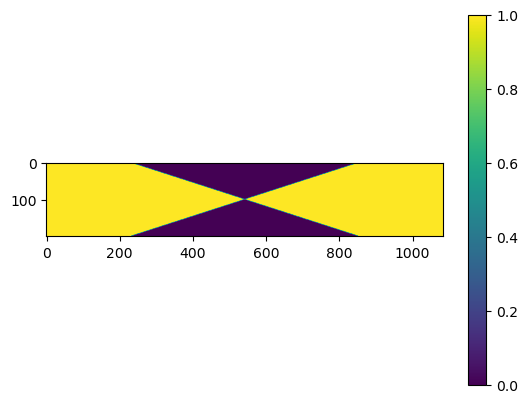

In [28]:
plt.imshow(mask[:, 1526 //2, :])
plt.colorbar()

In [30]:
torch.save(mask, "./rmbmask.pt")

In [31]:
torch.save(sample, "./emb_sample.pt")